**Load data to colab computer**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls /content/gdrive/MyDrive/laneDetection/laneDetectionData3.zip

/content/gdrive/MyDrive/laneDetection/laneDetectionData3.zip


In [ ]:
!unzip /content/gdrive/MyDrive/laneDetection/laneDetectionData3.zip

Archive:  /content/gdrive/MyDrive/laneDetection/laneDetectionData3.zip
   creating: Train/
  inflating: Train/F61-1.png         
  inflating: Train/F61-100.png       
  inflating: Train/F61-11.png        
  inflating: Train/F61-12.png        
  inflating: Train/F61-13.png        
  inflating: Train/F61-14.png        
  inflating: Train/F61-15.png        
  inflating: Train/F61-16.png        
  inflating: Train/F61-17.png        
  inflating: Train/F61-19.png        
  inflating: Train/F61-2.png         
  inflating: Train/F61-20.png        
  inflating: Train/F61-21.png        
  inflating: Train/F61-22.png        
  inflating: Train/F61-25.png        
  inflating: Train/F61-26.png        
  inflating: Train/F61-27.png        
  inflating: Train/F61-29.png        
  inflating: Train/F61-3.png         
  inflating: Train/F61-30.png        
  inflating: Train/F61-31.png        
  inflating: Train/F61-32.png        
  inflating: Train/F61-33.png        
  inflating: Train/F61-34.png      

In [ ]:
!unzip /content/gdrive/MyDrive/laneDetection/laneDetectionData4.zip


Archive:  /content/gdrive/MyDrive/laneDetection/laneDetectionData4.zip
   creating: label/
  inflating: label/F72-0.png         
  inflating: label/F72-1.png         
  inflating: label/F72-10.png        
  inflating: label/F72-100.png       
  inflating: label/F72-101.png       
  inflating: label/F72-102.png       
  inflating: label/F72-103.png       
  inflating: label/F72-104.png       
  inflating: label/F72-105.png       
  inflating: label/F72-106.png       
  inflating: label/F72-107.png       
  inflating: label/F72-108.png       
  inflating: label/F72-109.png       
  inflating: label/F72-11.png        
  inflating: label/F72-110.png       
  inflating: label/F72-111.png       
  inflating: label/F72-112.png       
  inflating: label/F72-113.png       
  inflating: label/F72-114.png       
  inflating: label/F72-115.png       
  inflating: label/F72-116.png       
  inflating: label/F72-117.png       
  inflating: label/F72-118.png       
  inflating: label/F72-119.png     

In [ ]:
!ls

gdrive	label  sample_data  train  Train  Train_label  Val  Val_label


In [ ]:
import os
listTrain = os.listdir('/content/train/')
listTrainLabel = os.listdir('/content/label/')
for name in listTrain:
    print(name)
    os.rename('/content/train/'+name,'/content/Train/'+name)
# for name in listTrainLabel:
    os.rename('/content/label/'+name,'/content/Train_label/'+name)
# os.rename

F72-118.png
F72-92.png
F72-122.png
F72-104.png
F72-64.png
F72-3.png
F72-13.png
F72-48.png
F72-108.png
F72-36.png
F72-77.png
F72-18.png
F72-88.png
F72-93.png
F72-102.png
F72-16.png
F72-84.png
F72-42.png
F72-55.png
F72-62.png
F72-74.png
F72-70.png
F72-85.png
F72-11.png
F72-47.png
F72-80.png
F72-73.png
F72-35.png
F72-56.png
F72-82.png
F72-109.png
F72-101.png
F72-94.png
F72-100.png
F72-49.png
F72-107.png
F72-0.png
F72-116.png
F72-126.png
F72-65.png
F72-8.png
F72-86.png
F72-22.png
F72-63.png
F72-124.png
F72-112.png
F72-67.png
F72-125.png
F72-4.png
F72-83.png
F72-33.png
F72-103.png
F72-61.png
F72-99.png
F72-106.png
F72-31.png
F72-37.png
F72-29.png
F72-123.png
F72-68.png
F72-98.png
F72-117.png
F72-40.png
F72-20.png
F72-21.png
F72-30.png
F72-72.png
F72-113.png
F72-97.png
F72-119.png
F72-14.png
F72-120.png
F72-28.png
F72-91.png
F72-2.png
F72-51.png
F72-57.png
F72-7.png
F72-71.png
F72-79.png
F72-19.png
F72-6.png
F72-23.png
F72-54.png
F72-115.png
F72-69.png
F72-76.png
F72-24.png
F72-66.png
F72-96

training data: 1194  images
validation data: 145  images


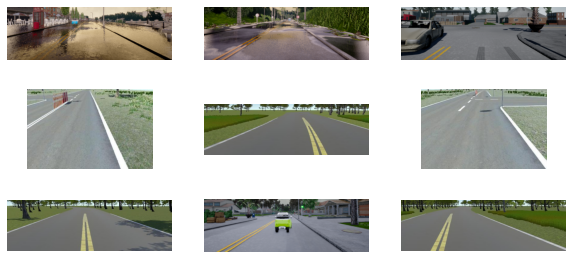

In [ ]:
import tensorflow as tf
from pathlib import Path
train_folder = Path('Train/')
val_folder = Path('Val/')  # label_name = filename 

train_size = len(list(train_folder.glob('*')))
val_size = len(list(val_folder.glob('*')))
print('training data:',train_size,' images')
print('validation data:',val_size,' images')

# for item in train_folder.glob('*'):
#   print(item.name)
filelist_ds = tf.data.Dataset.list_files(str(train_folder/'*'))
vallist_ds = tf.data.Dataset.list_files(str(val_folder/'*'))

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
for i,file in enumerate(filelist_ds.take(9)):
  # print(file)
  ax = plt.subplot(3, 3, i + 1)
  img = tf.io.read_file(file)
  img = tf.image.decode_png(img, channels=3)
  plt.imshow(img.numpy().astype("uint8"))
  # plt.title(str(file))
  plt.axis("off")


In [ ]:
def get_label_path(file_path):
  file_path = tf.strings.regex_replace(file_path, "Train/", "Train_label/")
  file_path = tf.strings.regex_replace(file_path, "Val/", "Val_label/")
#   file_path = tf.strings.regex_replace(file_path, ".png", ".png")
  return file_path

for file in filelist_ds.take(9):
  print(f'Data: {file.numpy()}  label: {get_label_path(file).numpy()}')


Data: b'Train/F69-26.png'  label: b'Train_label/F69-26.png'
Data: b'Train/F65-67.png'  label: b'Train_label/F65-67.png'
Data: b'Train/F72-35.png'  label: b'Train_label/F72-35.png'
Data: b'Train/F67-23.png'  label: b'Train_label/F67-23.png'
Data: b'Train/F67-97.png'  label: b'Train_label/F67-97.png'
Data: b'Train/F71-140.png'  label: b'Train_label/F71-140.png'
Data: b'Train/F68-10.png'  label: b'Train_label/F68-10.png'
Data: b'Train/F72-16.png'  label: b'Train_label/F72-16.png'
Data: b'Train/F61-15.png'  label: b'Train_label/F61-15.png'


In [ ]:
img_height = 140
img_width = 140
crop_height = 128
crop_width = 128
def CorrectForm(image):
    image = image.numpy()
    image[image<0] = 0
    image[image>1] = 1 
    return image

class Augment(tf.keras.layers.Layer):
  def __init__(self,seed=42):
    super().__init__()
    # both use the same seed, so they'll make the same random changes.
    self.Flip_inputs = tf.keras.layers.RandomFlip(mode="horizontal", seed=seed)
    self.Flip_labels = tf.keras.layers.RandomFlip(mode="horizontal", seed=seed)

    self.Crop_inputs = tf.keras.layers.RandomCrop(crop_height,crop_width,seed= seed) 
    self.Crop_labels = tf.keras.layers.RandomCrop(crop_height,crop_width,seed= seed) 

    self.Rot_inputs = tf.keras.layers.RandomRotation(0.12,seed=seed)
    self.Rot_labels = tf.keras.layers.RandomRotation(0.12,seed=seed)

    
    self.seed= seed

  def call(self, inputs, labels):
    inputs = self.Flip_inputs(inputs)
    inputs = self.Crop_inputs(inputs)
    # input = self.Rot_inputs(inputs)
    inputs = tf.image.random_brightness(inputs,0.3)
    inputs = tf.py_function(CorrectForm, inp = [inputs],Tout=tf.float32)
    # inputs = tf.image.convert_image_dtype(inputs,tf.float32)
    
    labels = self.Flip_labels(labels)
    labels = self.Crop_labels(labels)
    # labels = self.Rot_labels(labels)
    labels = tf.py_function(thresHold,inp=[labels],Tout=tf.float32)
    labels.set_shape((crop_height,crop_width,1))
    return inputs, labels
def thresHold (input):
    input = input.numpy()
    output = (input !=0)*1.0
    return output
def preprocessing(file_path,augment = True):
  
  if augment:
    height = img_height
    width = img_width
  else:
    height = crop_height
    width = crop_width

  # read file
  img = tf.io.read_file(file_path)
  img = tf.image.decode_png(img, channels=3)
  # augmentation
  # convert from uint8 to float32 and normalize to [0 1]
  img = tf.image.convert_image_dtype(img,tf.float32)
  # resize
  img = tf.image.resize(img, [width, height])
  # get label
  label = tf.io.read_file(get_label_path(file_path))
  label = tf.image.decode_png(label, channels=1)
  label = tf.image.convert_image_dtype(label,tf.float32)
  label = tf.image.resize(label, [width, height])
  label = tf.py_function(thresHold,inp=[label],Tout=tf.float32)
  label.set_shape((width,height,1))
  # return
  return img, label


In [ ]:
batch_size = 16
# Build training dataset
train_ds = filelist_ds.shuffle(train_size)
train_ds = train_ds.map(lambda x: preprocessing(x,augment = True))
# train_ds = train_ds.map(Augment())
train_ds = train_ds.batch(1)
train_ds = train_ds.prefetch(1)
# Build validation dataset
val_ds = vallist_ds.shuffle(val_size)
val_ds = val_ds.map(lambda x: preprocessing(x,augment = False))
val_ds = val_ds.batch(1)

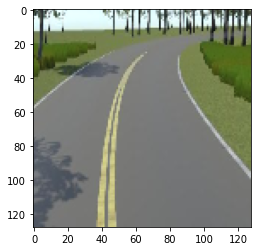

unique elements in label:  [0. 1.]


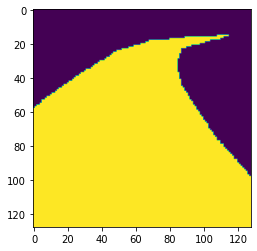

In [ ]:
# Check Label
import numpy as np
it = iter(train_ds) 
img,label = next(it)
img,label = Augment()(img[0],label[0])
imgLabel =label
imgLabel =imgLabel.numpy()
input = imgLabel
inside = np.unique(imgLabel)
# print(img[0])
plt.imshow(img)
plt.show()
print('unique elements in label: ',inside)
plt.imshow(imgLabel.reshape(128,128))

In [ ]:
import random
import os 
import skimage.io as io
from google.colab import output

 
new_len_need_generate = 9000
# os.mkdir('/content/DataAugmentation1/')
save_path_train = '/content/DataAugmentation/New_Train/'
save_path_label = '/content/DataAugmentation/New_Label/'
# os.mkdir(save_path_train)
# os.mkdir(save_path_label)

# while i<= new_len_need_generate:
for i in range(new_len_need_generate):
    it = iter(train_ds)
    imgs,labels = next(it)
    
    img,label = Augment()(imgs[0],labels[0])
    io.imsave(f'{save_path_train}Augmentation_{i}.png',img)
    io.imsave(f'{save_path_label}Augmentation_{i}.png',label)
    # img = imgs
    # imgLabel =labels
    # plt.imshow(img)
    # plt.show()
    output.clear()
    print(f'image {i+1} created')


image 9000 created


In [ ]:
train_ds = filelist_ds.shuffle(train_size)
train_ds = train_ds.map(lambda x: preprocessing(x,augment = False))
# train_ds = train_ds.map(Augment())
train_ds = train_ds.batch(1)
train_ds = train_ds.prefetch(1)

save_path_train = '/content/DataAugmentation/New_Train/'
save_path_label = '/content/DataAugmentation/New_Label/'
i =0
for imgs,labels in train_ds.take(train_size):
    # number = random.randint(0,batch_size-1)  
    # imgs,labels = next(it)
    img = imgs.numpy().reshape(128,128,3)
    label = labels.numpy().reshape(128,128)
    # img,label = Augment()(imgs[number],labels[number])
    io.imsave(f'{save_path_train}Augmentation_{i+new_len_need_generate}.png',img)
    io.imsave(f'{save_path_label}Augmentation_{i+new_len_need_generate}.png',label)
    # img = imgs
    # imgLabel =labels
    i+=1
    # output.clear()
    print(f'image {i+1} created')

image 2 created
image 3 created
image 4 created
image 5 created
image 6 created
image 7 created
image 8 created
image 9 created


image 10 created
image 11 created
image 12 created
image 13 created
image 14 created
image 15 created
image 16 created
image 17 created


image 18 created
image 19 created
image 20 created
image 21 created
image 22 created
image 23 created
image 24 created


image 25 created
image 26 created
image 27 created
image 28 created
image 29 created
image 30 created
image 31 created
image 32 created


image 33 created
image 34 created
image 35 created
image 36 created
image 37 created
image 38 created
image 39 created
image 40 created


image 41 created
image 42 created
image 43 created
image 44 created
image 45 created
image 46 created
image 47 created
image 48 created


image 49 created
image 50 created
image 51 created
image 52 created
image 53 created
image 54 created
image 55 created
image 56 created


image 57 created
image 58 created
image 59 created
image 60 created
image 61 created
image 62 created
image 63 created


image 64 created
image 65 created
image 66 created
image 67 created
image 68 created
image 69 created
image 70 created
image 71 created


image 72 created
image 73 created
image 74 created
image 75 created
image 76 created
image 77 created
image 78 created


image 79 created
image 80 created
image 81 created
image 82 created
image 83 created
image 84 created
image 85 created
image 86 created


image 87 created
image 88 created
image 89 created
image 90 created
image 91 created
image 92 created
image 93 created
image 94 created


image 95 created
image 96 created
image 97 created
image 98 created
image 99 created
image 100 created
image 101 created
image 102 created


image 103 created
image 104 created
image 105 created
image 106 created
image 107 created
image 108 created
image 109 created


image 110 created
image 111 created
image 112 created
image 113 created
image 114 created
image 115 created
image 116 created
image 117 created


image 118 created
image 119 created
image 120 created
image 121 created
image 122 created
image 123 created
image 124 created
image 125 created


image 126 created
image 127 created
image 128 created
image 129 created
image 130 created
image 131 created
image 132 created
image 133 created


image 134 created
image 135 created
image 136 created
image 137 created
image 138 created
image 139 created
image 140 created


image 141 created
image 142 created
image 143 created
image 144 created
image 145 created
image 146 created
image 147 created


image 148 created
image 149 created
image 150 created
image 151 created
image 152 created
image 153 created
image 154 created
image 155 created


image 156 created
image 157 created
image 158 created
image 159 created
image 160 created
image 161 created


image 162 created
image 163 created
image 164 created
image 165 created
image 166 created
image 167 created
image 168 created
image 169 created


image 170 created
image 171 created
image 172 created
image 173 created
image 174 created
image 175 created
image 176 created
image 177 created


image 178 created
image 179 created
image 180 created
image 181 created
image 182 created
image 183 created
image 184 created


image 185 created
image 186 created
image 187 created
image 188 created
image 189 created
image 190 created
image 191 created
image 192 created


image 193 created
image 194 created
image 195 created
image 196 created
image 197 created
image 198 created


image 199 created
image 200 created
image 201 created
image 202 created
image 203 created
image 204 created
image 205 created


image 206 created
image 207 created
image 208 created
image 209 created
image 210 created
image 211 created
image 212 created


image 213 created
image 214 created
image 215 created
image 216 created
image 217 created
image 218 created
image 219 created


image 220 created
image 221 created
image 222 created
image 223 created
image 224 created
image 225 created
image 226 created
image 227 created


image 228 created
image 229 created
image 230 created
image 231 created
image 232 created
image 233 created
image 234 created


image 235 created
image 236 created
image 237 created
image 238 created
image 239 created
image 240 created
image 241 created


image 242 created
image 243 created
image 244 created
image 245 created
image 246 created
image 247 created
image 248 created


image 249 created
image 250 created
image 251 created
image 252 created
image 253 created
image 254 created
image 255 created
image 256 created


image 257 created
image 258 created
image 259 created
image 260 created
image 261 created
image 262 created
image 263 created


image 264 created
image 265 created
image 266 created
image 267 created
image 268 created
image 269 created
image 270 created


image 271 created
image 272 created
image 273 created
image 274 created
image 275 created
image 276 created
image 277 created
image 278 created


image 279 created
image 280 created
image 281 created
image 282 created
image 283 created
image 284 created
image 285 created


image 286 created
image 287 created
image 288 created
image 289 created
image 290 created
image 291 created
image 292 created
image 293 created


image 294 created
image 295 created
image 296 created
image 297 created
image 298 created
image 299 created
image 300 created


image 301 created
image 302 created
image 303 created
image 304 created
image 305 created
image 306 created
image 307 created
image 308 created


image 309 created
image 310 created
image 311 created
image 312 created
image 313 created
image 314 created
image 315 created


image 316 created
image 317 created
image 318 created
image 319 created
image 320 created
image 321 created
image 322 created


image 323 created
image 324 created
image 325 created
image 326 created
image 327 created
image 328 created
image 329 created


image 330 created
image 331 created
image 332 created
image 333 created
image 334 created
image 335 created
image 336 created


image 337 created
image 338 created
image 339 created
image 340 created
image 341 created
image 342 created
image 343 created


image 344 created
image 345 created
image 346 created
image 347 created
image 348 created
image 349 created
image 350 created


image 351 created
image 352 created
image 353 created
image 354 created
image 355 created
image 356 created
image 357 created
image 358 created


image 359 created
image 360 created
image 361 created
image 362 created
image 363 created
image 364 created
image 365 created


image 366 created
image 367 created
image 368 created
image 369 created
image 370 created
image 371 created
image 372 created


image 373 created
image 374 created
image 375 created
image 376 created
image 377 created
image 378 created
image 379 created


image 380 created
image 381 created
image 382 created
image 383 created
image 384 created
image 385 created
image 386 created


image 387 created
image 388 created
image 389 created
image 390 created
image 391 created
image 392 created
image 393 created


image 394 created
image 395 created
image 396 created
image 397 created
image 398 created
image 399 created
image 400 created


image 401 created
image 402 created
image 403 created
image 404 created
image 405 created
image 406 created


image 407 created
image 408 created
image 409 created
image 410 created
image 411 created
image 412 created
image 413 created
image 414 created


image 415 created
image 416 created
image 417 created
image 418 created
image 419 created
image 420 created
image 421 created


image 422 created
image 423 created
image 424 created
image 425 created
image 426 created
image 427 created
image 428 created


image 429 created
image 430 created
image 431 created
image 432 created
image 433 created
image 434 created
image 435 created


image 436 created
image 437 created
image 438 created
image 439 created
image 440 created
image 441 created


image 442 created
image 443 created
image 444 created
image 445 created
image 446 created
image 447 created
image 448 created


image 449 created
image 450 created
image 451 created
image 452 created
image 453 created
image 454 created
image 455 created
image 456 created


image 457 created
image 458 created
image 459 created
image 460 created
image 461 created
image 462 created
image 463 created


image 464 created
image 465 created
image 466 created
image 467 created
image 468 created
image 469 created
image 470 created


image 471 created
image 472 created
image 473 created
image 474 created
image 475 created
image 476 created
image 477 created


image 478 created
image 479 created
image 480 created
image 481 created
image 482 created
image 483 created
image 484 created


image 485 created
image 486 created
image 487 created
image 488 created
image 489 created
image 490 created
image 491 created


image 492 created
image 493 created
image 494 created
image 495 created
image 496 created
image 497 created
image 498 created


image 499 created
image 500 created
image 501 created
image 502 created
image 503 created
image 504 created
image 505 created


image 506 created
image 507 created
image 508 created
image 509 created
image 510 created
image 511 created
image 512 created


image 513 created
image 514 created
image 515 created
image 516 created
image 517 created
image 518 created
image 519 created


image 520 created
image 521 created
image 522 created
image 523 created
image 524 created
image 525 created
image 526 created


image 527 created
image 528 created
image 529 created
image 530 created
image 531 created
image 532 created
image 533 created


image 534 created
image 535 created
image 536 created
image 537 created
image 538 created
image 539 created
image 540 created


image 541 created
image 542 created
image 543 created
image 544 created
image 545 created
image 546 created
image 547 created


image 548 created
image 549 created
image 550 created
image 551 created
image 552 created
image 553 created
image 554 created


image 555 created
image 556 created
image 557 created
image 558 created
image 559 created
image 560 created
image 561 created


image 562 created
image 563 created
image 564 created
image 565 created
image 566 created
image 567 created
image 568 created


image 569 created
image 570 created
image 571 created
image 572 created
image 573 created
image 574 created
image 575 created


image 576 created
image 577 created
image 578 created
image 579 created
image 580 created
image 581 created
image 582 created


image 583 created
image 584 created
image 585 created
image 586 created
image 587 created
image 588 created


image 589 created
image 590 created
image 591 created
image 592 created
image 593 created
image 594 created


image 595 created
image 596 created
image 597 created
image 598 created
image 599 created
image 600 created
image 601 created
image 602 created


image 603 created
image 604 created
image 605 created
image 606 created
image 607 created
image 608 created
image 609 created


image 610 created
image 611 created
image 612 created
image 613 created
image 614 created
image 615 created
image 616 created


image 617 created
image 618 created
image 619 created
image 620 created
image 621 created
image 622 created
image 623 created


image 624 created
image 625 created
image 626 created
image 627 created
image 628 created
image 629 created
image 630 created


image 631 created
image 632 created
image 633 created
image 634 created
image 635 created
image 636 created
image 637 created


image 638 created
image 639 created
image 640 created
image 641 created
image 642 created
image 643 created
image 644 created


image 645 created
image 646 created
image 647 created
image 648 created
image 649 created
image 650 created
image 651 created


image 652 created
image 653 created
image 654 created
image 655 created
image 656 created
image 657 created
image 658 created


image 659 created
image 660 created
image 661 created
image 662 created
image 663 created
image 664 created
image 665 created
image 666 created


image 667 created
image 668 created
image 669 created
image 670 created
image 671 created
image 672 created


image 673 created
image 674 created
image 675 created
image 676 created
image 677 created
image 678 created
image 679 created


image 680 created
image 681 created
image 682 created
image 683 created
image 684 created
image 685 created
image 686 created


image 687 created
image 688 created
image 689 created
image 690 created
image 691 created
image 692 created
image 693 created


image 694 created
image 695 created
image 696 created
image 697 created
image 698 created
image 699 created
image 700 created


image 701 created
image 702 created
image 703 created
image 704 created
image 705 created
image 706 created
image 707 created


image 708 created
image 709 created
image 710 created
image 711 created
image 712 created
image 713 created
image 714 created


image 715 created
image 716 created
image 717 created
image 718 created
image 719 created
image 720 created
image 721 created


image 722 created
image 723 created
image 724 created
image 725 created
image 726 created
image 727 created
image 728 created


image 729 created
image 730 created
image 731 created
image 732 created
image 733 created
image 734 created
image 735 created


image 736 created
image 737 created
image 738 created
image 739 created
image 740 created
image 741 created
image 742 created


image 743 created
image 744 created
image 745 created
image 746 created
image 747 created
image 748 created
image 749 created


image 750 created
image 751 created
image 752 created
image 753 created
image 754 created
image 755 created
image 756 created


image 757 created
image 758 created
image 759 created
image 760 created
image 761 created
image 762 created
image 763 created


image 764 created
image 765 created
image 766 created
image 767 created
image 768 created
image 769 created
image 770 created


image 771 created
image 772 created
image 773 created
image 774 created
image 775 created
image 776 created


image 777 created
image 778 created
image 779 created
image 780 created
image 781 created
image 782 created
image 783 created


image 784 created
image 785 created
image 786 created
image 787 created
image 788 created
image 789 created


image 790 created
image 791 created
image 792 created
image 793 created
image 794 created
image 795 created
image 796 created


image 797 created
image 798 created
image 799 created
image 800 created
image 801 created
image 802 created
image 803 created


image 804 created
image 805 created
image 806 created
image 807 created
image 808 created
image 809 created


image 810 created
image 811 created
image 812 created
image 813 created
image 814 created
image 815 created


image 816 created
image 817 created
image 818 created
image 819 created
image 820 created
image 821 created
image 822 created


image 823 created
image 824 created
image 825 created
image 826 created
image 827 created
image 828 created
image 829 created


image 830 created
image 831 created
image 832 created
image 833 created
image 834 created
image 835 created


image 836 created
image 837 created
image 838 created
image 839 created
image 840 created
image 841 created
image 842 created


image 843 created
image 844 created
image 845 created
image 846 created
image 847 created
image 848 created


image 849 created
image 850 created
image 851 created
image 852 created
image 853 created
image 854 created
image 855 created


image 856 created
image 857 created
image 858 created
image 859 created
image 860 created
image 861 created
image 862 created


image 863 created
image 864 created
image 865 created
image 866 created
image 867 created
image 868 created


image 869 created
image 870 created
image 871 created
image 872 created
image 873 created
image 874 created
image 875 created


image 876 created
image 877 created
image 878 created
image 879 created
image 880 created
image 881 created


image 882 created
image 883 created
image 884 created
image 885 created
image 886 created
image 887 created
image 888 created


image 889 created
image 890 created
image 891 created
image 892 created
image 893 created
image 894 created


image 895 created
image 896 created
image 897 created
image 898 created
image 899 created
image 900 created
image 901 created


image 902 created
image 903 created
image 904 created
image 905 created
image 906 created
image 907 created


image 908 created
image 909 created
image 910 created
image 911 created
image 912 created
image 913 created


image 914 created
image 915 created
image 916 created
image 917 created
image 918 created
image 919 created
image 920 created


image 921 created
image 922 created
image 923 created
image 924 created
image 925 created
image 926 created


image 927 created
image 928 created
image 929 created
image 930 created
image 931 created
image 932 created
image 933 created


image 934 created
image 935 created
image 936 created
image 937 created
image 938 created
image 939 created


image 940 created
image 941 created
image 942 created
image 943 created
image 944 created
image 945 created
image 946 created


image 947 created
image 948 created
image 949 created
image 950 created
image 951 created
image 952 created


image 953 created
image 954 created
image 955 created
image 956 created
image 957 created
image 958 created
image 959 created


image 960 created
image 961 created
image 962 created
image 963 created
image 964 created
image 965 created


image 966 created
image 967 created
image 968 created
image 969 created
image 970 created
image 971 created
image 972 created


image 973 created
image 974 created
image 975 created
image 976 created
image 977 created
image 978 created
image 979 created


image 980 created
image 981 created
image 982 created
image 983 created
image 984 created
image 985 created
image 986 created
image 987 created


image 988 created
image 989 created
image 990 created
image 991 created
image 992 created
image 993 created


image 994 created
image 995 created
image 996 created
image 997 created
image 998 created
image 999 created
image 1000 created


image 1001 created
image 1002 created
image 1003 created
image 1004 created
image 1005 created
image 1006 created


image 1007 created
image 1008 created
image 1009 created
image 1010 created
image 1011 created
image 1012 created


image 1013 created
image 1014 created
image 1015 created
image 1016 created
image 1017 created
image 1018 created
image 1019 created


image 1020 created
image 1021 created
image 1022 created
image 1023 created
image 1024 created
image 1025 created


image 1026 created
image 1027 created
image 1028 created
image 1029 created
image 1030 created
image 1031 created


image 1032 created
image 1033 created
image 1034 created
image 1035 created
image 1036 created
image 1037 created
image 1038 created


image 1039 created
image 1040 created
image 1041 created
image 1042 created
image 1043 created
image 1044 created
image 1045 created


image 1046 created
image 1047 created
image 1048 created
image 1049 created
image 1050 created
image 1051 created


image 1052 created
image 1053 created
image 1054 created
image 1055 created
image 1056 created


image 1057 created
image 1058 created
image 1059 created
image 1060 created
image 1061 created
image 1062 created
image 1063 created


image 1064 created
image 1065 created
image 1066 created
image 1067 created
image 1068 created
image 1069 created
image 1070 created


image 1071 created
image 1072 created
image 1073 created
image 1074 created
image 1075 created
image 1076 created
image 1077 created


image 1078 created
image 1079 created
image 1080 created
image 1081 created
image 1082 created
image 1083 created


image 1084 created
image 1085 created
image 1086 created
image 1087 created
image 1088 created
image 1089 created
image 1090 created


image 1091 created
image 1092 created
image 1093 created
image 1094 created
image 1095 created
image 1096 created


image 1097 created
image 1098 created
image 1099 created
image 1100 created
image 1101 created
image 1102 created
image 1103 created


image 1104 created
image 1105 created
image 1106 created
image 1107 created
image 1108 created
image 1109 created
image 1110 created


image 1111 created
image 1112 created
image 1113 created
image 1114 created
image 1115 created
image 1116 created


image 1117 created
image 1118 created
image 1119 created
image 1120 created
image 1121 created
image 1122 created
image 1123 created


image 1124 created
image 1125 created
image 1126 created
image 1127 created
image 1128 created
image 1129 created


image 1130 created
image 1131 created
image 1132 created
image 1133 created
image 1134 created
image 1135 created


image 1136 created
image 1137 created
image 1138 created
image 1139 created
image 1140 created
image 1141 created
image 1142 created


image 1143 created
image 1144 created
image 1145 created
image 1146 created
image 1147 created
image 1148 created


image 1149 created
image 1150 created
image 1151 created
image 1152 created
image 1153 created
image 1154 created


image 1155 created
image 1156 created
image 1157 created
image 1158 created
image 1159 created
image 1160 created
image 1161 created


image 1162 created
image 1163 created
image 1164 created
image 1165 created
image 1166 created
image 1167 created


image 1168 created
image 1169 created
image 1170 created
image 1171 created
image 1172 created
image 1173 created


image 1174 created
image 1175 created
image 1176 created
image 1177 created
image 1178 created
image 1179 created
image 1180 created


image 1181 created
image 1182 created
image 1183 created
image 1184 created
image 1185 created
image 1186 created


image 1187 created
image 1188 created
image 1189 created
image 1190 created
image 1191 created
image 1192 created


image 1193 created
image 1194 created
image 1195 created


In [ ]:
import os


In [ ]:
!ls /content/DataAugmentation/New_Label | wc -l

10194


In [ ]:
!ls /content/DataAugmentation/New_Train | wc -l

10194


In [ ]:
!zip -r  /content/AugmentationData.zip /content/DataAugmentation

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  adding: content/DataAugmentation/New_Label/Augmentation_7221.png (deflated 0%)
  adding: content/DataAugmentation/New_Label/Augmentation_728.png (stored 0%)
  adding: content/DataAugmentation/New_Label/Augmentation_3027.png (stored 0%)
  adding: content/DataAugmentation/New_Label/Augmentation_729.png (stored 0%)
  adding: content/DataAugmentation/New_Label/Augmentation_3428.png (deflated 3%)
  adding: content/DataAugmentation/New_Label/Augmentation_5233.png (stored 0%)
  adding: content/DataAugmentation/New_Label/Augmentation_4518.png (stored 0%)
  adding: content/DataAugmentation/New_Label/Augmentation_2752.png (stored 0%)
  adding: content/DataAugmentation/New_Label/Augmentation_8983.png (stored 0%)
  adding: content/DataAugmentation/New_Label/Augmentation_5329.png (stored 0%)
  adding: content/DataAugmentation/New_Label/Augmentation_7100.png (stored 0%)
  adding: content/DataAugmentation/New_Label/Augmentation_3201.png (stor

In [ ]:
!ls /content/AugmentationData.zip

/content/AugmentationData.zip


In [ ]:
from google.colab import files
files.download("/content/AugmentationData.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>